## Beschreibung

Es soll ein Bild aus dem HDR-VDP genommen werden und der Rotanteil in den Wertebereich 0 - 1 übertragen werden.
Daraus wird ein Grayscale Bild erstellt, welches sich mit dem Output des CNN vergleichen lässt


In [97]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


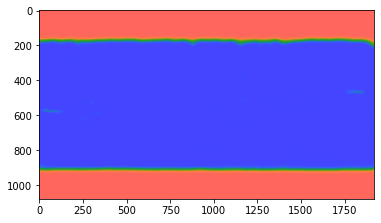

In [98]:
FILE_PATH = "D:\Main\MA_PROGR\hdrvdp-3.0.6"
img_name = "output_clean_vs_blur.png"

img = cv2.imread(f"{FILE_PATH}\{img_name}")

plt.imshow(img)


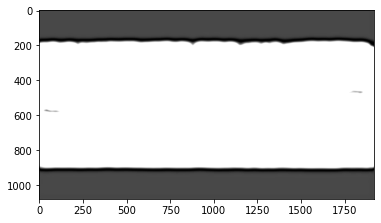

In [99]:
img_r = img[:,:,2]
plt.imshow(img_r, cmap="gray")


In [100]:
print(img_r)

[[97 97 96 ... 96 96 96]
 [97 96 96 ... 96 96 96]
 [96 96 96 ... 95 96 96]
 ...
 [96 96 95 ... 95 95 95]
 [96 96 96 ... 95 95 95]
 [96 96 96 ... 95 95 96]]


In [101]:
BUCKET_SIZE = 60
size_y = img.shape[0]
size_x = img.shape[1]

steps_horizontal = int(size_x/BUCKET_SIZE)
steps_vertikal = int(size_y/BUCKET_SIZE)


In [102]:

vdp_values = np.full((steps_vertikal, steps_horizontal), 0).tolist()


In [103]:
def create_tile(bucket_size, vdp_values):
    myArray = np.zeros((BUCKET_SIZE, BUCKET_SIZE))
    for y in range(bucket_size):
        for x in range(bucket_size):
            myArray[y][x] = vdp_values
    return myArray


In [104]:
def mean_red_amount(bucket):
    # print("betrete mean red: ")
    sum = 0
    for y in range(BUCKET_SIZE):
        for x in range(BUCKET_SIZE):
            sum += bucket[y, x]
    return sum / (BUCKET_SIZE*BUCKET_SIZE)


def create_2D_Matrix_from_HDRVDP_Image(img):
    img_r = img[:,:,2] / 255
    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            bucket = img_r[y*BUCKET_SIZE:(y+1)*BUCKET_SIZE, x *
                         BUCKET_SIZE:(x+1)*BUCKET_SIZE]
            tmp_res = mean_red_amount(bucket)
            # return
            vdp_values[y][x] = tmp_res
    np_name = img_name.split(".")[0]
    np.save(np_name, vdp_values)
    return vdp_values

create_2D_Matrix_from_HDRVDP_Image(img)


np.save


<function numpy.save(file, arr, allow_pickle=True, fix_imports=True)>

In [105]:
def create_grayscale_img(img):

    horizontal_stripes = []
    horizontal_result = 0
    final_result = 0

    vdp_values = create_2D_Matrix_from_HDRVDP_Image(img)

    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            # print("x: {}".format(x))
            if x == 0:
                horizontal_result = create_tile(
                    BUCKET_SIZE, vdp_values[y][x])
                plt.imshow(horizontal_result)
                continue
            horizontal_result = np.concatenate(
                (horizontal_result, create_tile(BUCKET_SIZE, vdp_values[y][x])), axis=1)
        if y == 0:
            final_result = horizontal_result
            continue
        final_result = np.concatenate((final_result, horizontal_result))
        horizontal_result = 0

    return final_result

    # plt.imshow(final_result, cmap="gray")
    # plt.show()


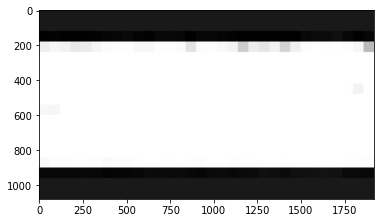

In [106]:
grayscale_image = create_grayscale_img(img)
plt.imshow(grayscale_image, cmap="gray")
plt.show()

plt.imsave("example.png",grayscale_image, cmap="gray")

